In [ ]:
# 불필요한 경고 출력 방지
import warnings

warnings.filterwarnings("ignore")

In [6]:
# 데이터 세트 로딩
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
data = iris.data
feature_names = iris.feature_names

In [8]:
target = iris.target
target_names = iris.target_names

In [9]:
import pandas as pd

iris_df = pd.DataFrame(
    data=data,
    columns = feature_names
)

iris_df["target"] = target
iris_df.head()
# 타겟은 시각화 용도로 쓰임

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 꽃잎과 꽃받침을 따로 시각화
sepal_columns = [feature_names[0], feature_names[1]]
petal_columns = [feature_names[2], feature_names[3]]

sepal_columns, petal_columns

(['sepal length (cm)', 'sepal width (cm)'],
 ['petal length (cm)', 'petal width (cm)'])

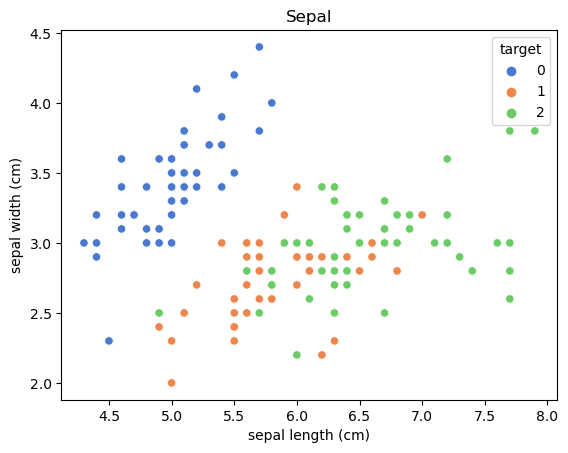

In [12]:
# 꽃받침 시각화
sns.scatterplot(
    x=sepal_columns[0],
    y=sepal_columns[1],
    hue='target',
    data=iris_df,
    palette="muted"
)

plt.title("Sepal")
plt.show()
# 각 클래스별 분산을 확인해본다.
# 1,2번의 클래스는 분산의 구분이 잘 되지 않는다.

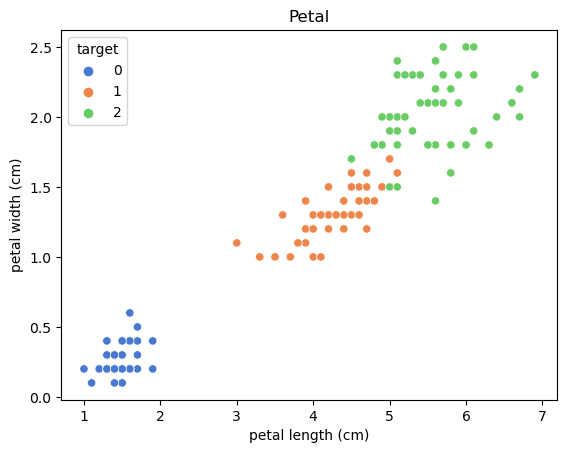

In [13]:
# 꽃잎 시각화
sns.scatterplot(
    x=petal_columns[0],
    y=petal_columns[1],
    hue='target',
    data=iris_df,
    palette="muted"
)

plt.title("Petal")
plt.show()
# 4개의 특성 중 도움이 되는 특성은 2개로 판단된다.

# PCA로 차원 변환

In [14]:
# 4차원 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(iris_df.drop("target",axis=1))

# 데이터 변환 수행
iris_pca = pca_2.transform(iris_df.drop("target",axis=1))

iris_pca.shape

(150, 2)

In [15]:
# PCA로 변환된 데이터를 DataFrame으로 만들기
# PCA로 변환된(압축된) 콜럼의 이름은 판단하기 어렵기 때문에 Component1 등으로 표시함
# 차원이 축소 되어도 target은 대상에 1:1로 일치한다
pca_columns = ["Component 1", "Component 2"]
iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_columns
)
iris_pca_df["target"] = target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


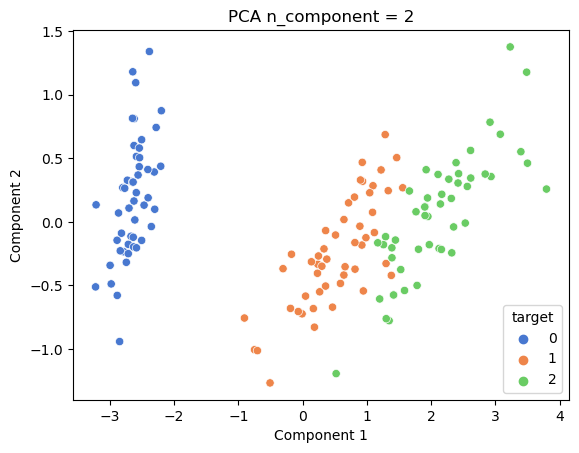

In [16]:
sns.scatterplot(
    x="Component 1",
    y="Component 2",
    hue='target',
    palette='muted',
    data=iris_pca_df
)

plt.title("PCA n_component = 2")
plt.show()

In [17]:
# 4차원에서 3차원으로 차원축소 해보기

pca_3 = PCA(n_components=3)

iris_pca_3 = pca_3.fit_transform(iris_df.drop("target",axis=1))
iris_pca_3.shape

(150, 3)

In [18]:
# PCA로 변환된 데이터를 DataFrame으로 만들기

pca_columns = ["Component 1", "Component 2", "Component 3"]
iris_pca_df = pd.DataFrame(
    iris_pca_3,
    columns=pca_columns
)
iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,Component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


In [19]:
%matplotlib inline

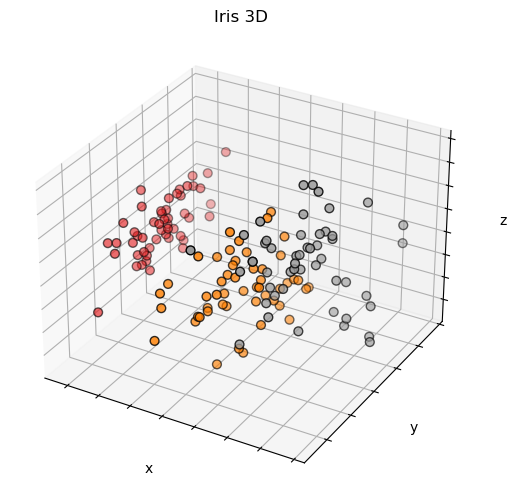

In [20]:
# 3차원 시각화

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris_pca_df["Component 1"], # x축 데이터
           iris_pca_df["Component 2"], # y축 데이터
           iris_pca_df["Component 3"], # z축 데이터
           c=iris_pca_df['target'], # 3d scatter의 색깔 기준
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([]) # x축 tick 사용하지 않기
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()
# 4차원부터 시각화 불가능

# PCA를 사용해서 모델만들기

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


# PCA 적용 후 모델 성능 확인

In [22]:
# 4차원 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(iris_df.drop("target", axis=1))

# 데이터 변환 수행
iris_pca = pca_2.transform(iris_df.drop("target", axis=1))

# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ["Component 1", "Component 2"]
iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_columns
)
iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [23]:
rcf = RandomForestClassifier(random_state=156)

pca_X = iris_pca_df[['Component 1', 'Component 2']]
scores_pca = cross_val_score(rcf, pca_X, iris_pca_df['target'], scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.94 0.96 0.98]
PCA 변환 데이터 평균 정확도: 0.96


### 4차원 feature를 사용해서 모델에 입력 하는 것과, 2차원 feature로 압축해서 모델에 입력한 결과가 성능이 비슷하게 나오는 것을 확인!